In [16]:
import geopandas as gpd
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

estimator = KMeans(n_clusters = 4)

In [19]:
from sklearn.model_selection import train_test_split

In [17]:
sago_data = pd.read_csv('sago.csv')
del sago_data['Unnamed: 0']

sago_list = []
for i in range(0, 23652):
    if sago_data['acci_cnt'][i] == 0:
        sago_list.append(int(0))
    else:
        sago_list.append(int(1))
        
sago_list = pd.DataFrame(sago_list)

data_c = sago_data[sago_data['사고유형'].str.contains('차대차')]
data_s = sago_data[sago_data['사고유형'].str.contains('차대사람')]
data_d = sago_data[sago_data['사고유형'].str.contains('차량단독')]

sago_c = data_c.copy()
sago_s = data_s.copy()
sago_d = data_d.copy()

sago_c = sago_c.set_index('gid')
sago_s = sago_s.set_index('gid')
sago_d = sago_d.set_index('gid')

sago_cc = sago_c.iloc[: , [0, 24]]
sago_ss = sago_s.iloc[: , [0, 24]]
sago_dd = sago_d.iloc[: , [0, 24]]

cluster_idsc = estimator.fit_predict(sago_cc)
cluster_idss = estimator.fit_predict(sago_ss)
cluster_idsd = estimator.fit_predict(sago_dd)

aac = cluster_idsc.tolist()
aas = cluster_idss.tolist()
aad = cluster_idsd.tolist()

data_c['cluster'] = aac
data_s['cluster'] = aas
data_d['cluster'] = aad

sago_c0 = data_c[data_c['cluster'] == 0]
sago_c1 = data_c[data_c['cluster'] == 1]
sago_c2 = data_c[data_c['cluster'] == 2]
sago_c3 = data_c[data_c['cluster'] == 3]

sago_s0 = data_s[data_s['cluster'] == 0]
sago_s1 = data_s[data_s['cluster'] == 1]
sago_s2 = data_s[data_s['cluster'] == 2]
sago_s3 = data_s[data_s['cluster'] == 3]

sago_d0 = data_d[data_d['cluster'] == 0]
sago_d1 = data_d[data_d['cluster'] == 1]
sago_d2 = data_d[data_d['cluster'] == 2]
sago_d3 = data_d[data_d['cluster'] == 3]

In [18]:
sago_sil = sago_c0.iloc[ : , [1, 4,5,7,8,9,10,11,13,14,15,24,25]]

In [20]:
data_tong = pd.concat([data_c, data_s, data_d], axis=0)
data_tong = data_tong.reset_index()

del data_tong['index']
del data_tong['총안전시설물']
del data_tong['cluster']
del data_tong['평균위도_Lat']
del data_tong['평균경도_Lon']
del data_tong['일시']
del data_tong['구']
del data_tong['동']
del data_tong['geometry']
del data_tong['년도']

data_tong = data_tong.replace('차대차 - 측면충돌', int(0))
data_tong = data_tong.replace('차대차 - 기타', int(0))
data_tong = data_tong.replace('차대차 - 추돌', int(0))
data_tong = data_tong.replace('차대차 - 후진중충돌', int(0))
data_tong = data_tong.replace('차대차 - 정면충돌', int(0))

data_tong = data_tong.replace('차대사람 - 횡단중', int(1))
data_tong = data_tong.replace('차대사람 - 기타', int(1))
data_tong = data_tong.replace('차대사람 - 길가장자리구역통행중', int(1))
data_tong = data_tong.replace('차대사람 - 차도통행중', int(1))
data_tong = data_tong.replace('차대사람 - 보도통행중', int(1))

data_tong = data_tong.replace('차량단독 - 기타', int(2))
data_tong = data_tong.replace('차량단독 - 공작물충돌', int(2))
data_tong = data_tong.replace('차량단독 - 전도전복 - 전도', int(2))
data_tong = data_tong.replace('차량단독 - 전도전복', int(2))
data_tong = data_tong.replace('차량단독 - 주/정차차량 충돌', int(2))
data_tong = data_tong.replace('차량단독 - 도로외이탈 - 추락', int(2))
data_tong = data_tong.replace('차량단독 - 전도전복 - 전복', int(2))
data_tong = data_tong.replace('차량단독 - 도로외이탈 - 기타', int(2))

data_tong = data_tong.replace('10대미만', int(0))
data_tong = data_tong.replace('10대', int(1))
data_tong = data_tong.replace('20대', int(2))
data_tong = data_tong.replace('30대', int(3))
data_tong = data_tong.replace('40대', int(4))
data_tong = data_tong.replace('50대', int(5))
data_tong = data_tong.replace('60대', int(6))
data_tong = data_tong.replace('70대', int(7))
data_tong = data_tong.replace('80대', int(8))
data_tong = data_tong.replace('90대', int(9))
data_tong = data_tong.replace('미분류', int(10))

data_tong = data_tong.replace('기타불명', int(15))

data_tong = data_tong.replace('남', int(0))
data_tong = data_tong.replace('여', int(1))

In [21]:
data_when = data_tong.copy()

In [22]:
list_sa = []

for i in range(0, 23652):
    if data_when['acci_cnt'][i] >= 1:
        list_sa.append(int(1))
    else:
        list_sa.append(int(0))
        
list_sa = pd.DataFrame(list_sa)
list_sa = list_sa.rename({0:'사고유무'}, axis='columns')
data_when = pd.concat([data_when, list_sa], axis=1)

In [10]:
data_where = gpd.read_file('accident_data.geojson')
data_what = gpd.read_file('total_data.geojson')

In [23]:
da_what = pd.merge(data_what, data_when, how='left', left_on='gid', right_on='gid')

In [24]:
da_what = data_what.copy()

In [25]:
del da_what['최소위도']
del da_what['최대위도']
del da_what['최소경도']
del da_what['최대경도']
del da_what['평균위도_Lat']
del da_what['평균경도_Lon']
del da_what['geometry']

In [26]:
da_when = data_when.iloc[:, [0, 11,12,13,14,15,16,17]]

In [27]:
del da_when['가해운전자 연령대']
del da_when['가해운전자 성별']

In [28]:
display(da_when[da_when.duplicated()])
da_when.drop_duplicates(inplace=True)

,gid,총인구,고령자인구,생산가능인구,유소년인구,등록차량
2,다바885170,32.0,0.0,31.0,0.0,27
3,다바885170,32.0,0.0,31.0,0.0,27
4,다바885170,32.0,0.0,31.0,0.0,27
5,다바885170,32.0,0.0,31.0,0.0,27
6,다바885170,32.0,0.0,31.0,0.0,27
...,...,...,...,...,...,...
23647,다바905170,0.0,0.0,0.0,0.0,0
23648,다바905170,0.0,0.0,0.0,0.0,0
23649,다바859207,0.0,0.0,0.0,0.0,0
23650,다바863149,0.0,0.0,0.0,0.0,0


In [29]:
da_chl = pd.merge(da_what, da_when, how='left', left_on='gid', right_on='gid')

In [30]:
da_chl = da_chl.fillna(int(0))

In [31]:
data_chl = da_chl.copy()

# 여기서부터 시작
## 전체격자에 대한 사고(중복X)

In [32]:
data_chl

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량
0,다바866110,0,0,0,0,146.59,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,다바823157,0,0,3,4,5944.98,0,14,2,5,0,0.0,0.0,0.0,0.0,0.0
2,다바928260,0,0,6,5,1487.49,0,14,0,5,0,0.0,0.0,0.0,0.0,0.0
3,다바931203,2,1,1,3,1291.19,0,5,1,1,0,0.0,0.0,0.0,0.0,409.0
4,다바836109,0,0,2,0,12875.52,0,6,0,2,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54907,다바861065,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
54908,다바912036,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
54909,다바867189,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
54910,다바851062,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


## 회귀분석
- 독립변수가 사고횟수에 일어나는 영향력을 알아보기 위함
- 차량사고는 없음

In [33]:
x = data_chl[['보행_신호등갯수', '차량_신호등갯수', '연면적', 'CCTV갯수', '교통안전표시', '안전지대', '횡단보도', '정차금지지대', '총인구', '고령자인구', '생산가능인구', '유소년인구', '등록차량',]]

y = data_chl[['사고경우']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

## x에 대한 독립변수들이 y사고유무에 대해서 얼마나 영향력을 주는지 분석

In [34]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

## 80퍼센트의 데이터로 학습을 시킨후 my_sago로 내가 직접 사고경우 예측해 본 것

In [35]:
my_sago = [[5, 4, 700, 2, 8, 1, 5, 0, 20, 5, 10, 5, 140]]
my_predict = mlr.predict(my_sago)

In [36]:
my_predict

array([[0.62747669]])

In [37]:
y_predict = mlr.predict(x_test)

## 현재 적용되어 있는 변수들로 학습시킨 결과 57퍼센트의 정확성을 나타내고 있음

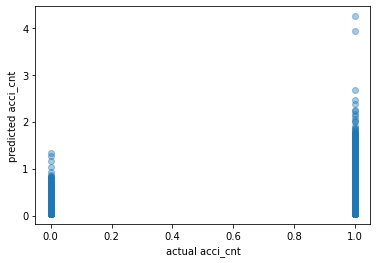

In [38]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("actual acci_cnt")
plt.ylabel("predicted acci_cnt")
plt.show()

In [39]:
print(mlr.score(x_train, y_train))

0.5710933344068071


## 새로운 모델 xgb 사용하여 분석해보기

In [41]:
data_chlg = data_chl.copy()
del data_chlg['gid']

from sklearn.model_selection import train_test_split  
X = data_chlg.drop(['acci_cnt','사고경우'], axis=1) 
Y = data_chlg['사고경우']                    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

tree.fit(X_train, y_train)

display(tree.score(X_test, y_test))

0.9759615384615384

In [42]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [43]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[11:38:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60694	eval-logloss:0.60665
[1]	train-logloss:0.53641	eval-logloss:0.53577
[2]	train-logloss:0.47758	eval-logloss:0.47689
[3]	train-logloss:0.42797	eval-logloss:0.42706
[4]	train-logloss:0.38570	eval-logloss:0.38462
[5]	train-logloss:0.34941	eval-logloss:0.34815
[6]	train-logloss:0.31801	eval-logloss:0.31671
[7]	train-logloss:0.29073	eval-logloss:0.28929
[8]	train-logloss:0.26689	eval-logloss:0.26539
[9]	train-logloss:0.24605	eval-logloss:0.24452
[10]	train-logloss:0.22773	eval-logloss:0.22607
[11]	train-logloss:0.21160	eval-logloss:0.20993
[12]	train-logloss:0.19736	eval-logloss:0.19562
[13]	train-logloss:0.18479	eval-logloss:0.1

In [44]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.009 0.009 0.009 0.009 0.009 0.009 0.009 1.    1.    1.   ]


In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [46]:
get_clf_eval(y_test, preds)

오차행렬
[[12125    38]
 [  287  1278]]
정확도: 0.9763, 정밀도: 0.9711, 재현율: 0.8166


In [47]:
ndata_chl = data_chl.copy()

In [48]:
ndata_chl['사고유무2'] = tree.predict(ndata_chl.loc[: , '보행_신호등갯수':'등록차량'])

In [49]:
ndata_chl.head(3)

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2
0,다바866110,0,0,0,0,146.59,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
1,다바823157,0,0,3,4,5944.98,0,14,2,5,0,0.0,0.0,0.0,0.0,0.0,0
2,다바928260,0,0,6,5,1487.49,0,14,0,5,0,0.0,0.0,0.0,0.0,0.0,0


In [50]:
dtest_ndata_chl = xgb.DMatrix(data=ndata_chl.loc[: , '보행_신호등갯수':'등록차량'])

In [51]:
ndata_chl['사고유무3'] = xgb_model.predict(dtest_ndata_chl)

In [52]:
ndata_chl

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3
0,다바866110,0,0,0,0,146.59,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.006633
1,다바823157,0,0,3,4,5944.98,0,14,2,5,0,0.0,0.0,0.0,0.0,0.0,0,0.558358
2,다바928260,0,0,6,5,1487.49,0,14,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0.264277
3,다바931203,2,1,1,3,1291.19,0,5,1,1,0,0.0,0.0,0.0,0.0,409.0,1,0.998111
4,다바836109,0,0,2,0,12875.52,0,6,0,2,0,0.0,0.0,0.0,0.0,0.0,0,0.012043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54907,다바861065,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843
54908,다바912036,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843
54909,다바867189,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843
54910,다바851062,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843


## 사고가 일어난 경우 1, 일어나지 않은 경우 0
- 일어나지 않은 경우의 여집합은 일어날 경우이기에 모두가 일어난다는 가정하에 계산

In [53]:
rank_list = []

for i in range(0,54912):
    if ndata_chl['사고유무2'][i] == 1:
        rank_list.append(ndata_chl['사고유무3'][i])
    else:
        rank_list.append(1 - ndata_chl['사고유무3'][i])

In [54]:
rank_data = pd.DataFrame(rank_list)
ndata_chl = pd.concat([ndata_chl, rank_data], axis=1)
ndata_chl = ndata_chl.rename({0:'일어날확률'}, axis='columns')
ndata_chl.head(3)

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률
0,다바866110,0,0,0,0,146.59,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.006633,0.993367
1,다바823157,0,0,3,4,5944.98,0,14,2,5,0,0.0,0.0,0.0,0.0,0.0,0,0.558358,0.441642
2,다바928260,0,0,6,5,1487.49,0,14,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0.264277,0.735723


## 사고가 일어날 확률과 그 확률의 횟수를 제곱하여 rank_point를 기재

In [55]:
ndata_chl['rank_point'] = ndata_chl['일어날확률'] ** ndata_chl['acci_cnt']

In [57]:
ndata_chl.head()

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률,rank_point
0,다바866110,0,0,0,0,146.59,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.006633,0.993367,1.000000
1,다바823157,0,0,3,4,5944.98,0,14,2,5,0,0.0,0.0,0.0,0.0,0.0,0,0.558358,0.441642,1.000000
2,다바928260,0,0,6,5,1487.49,0,14,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0.264277,0.735723,1.000000
3,다바931203,2,1,1,3,1291.19,0,5,1,1,0,0.0,0.0,0.0,0.0,409.0,1,0.998111,0.998111,0.996227
4,다바836109,0,0,2,0,12875.52,0,6,0,2,0,0.0,0.0,0.0,0.0,0.0,0,0.012043,0.987957,1.000000


## rank_point를 기준으로 정렬 - 내림차순
- 그 후 100개데이터만 선정

In [66]:
rank_100 = ndata_chl.sort_values(by=['rank_point'], axis=0, ascending=True)
rank_100

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률,rank_point
611,다바889167,36,1,3,4,6975.29,2,23,6,6,0,0.0,0.0,0.0,0.0,0.0,0,0.987991,0.012009,7.273363e-70
3989,다바825160,19,1,8,12,144.69,0,25,8,4,0,0.0,0.0,0.0,0.0,0.0,0,0.985175,0.014825,1.773883e-35
2330,다바939179,51,1,6,16,3637.26,2,24,0,7,0,0.0,0.0,0.0,0.0,0.0,0,0.772917,0.227083,1.463626e-33
12259,다바848176,36,1,1,6,611.70,0,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0.692459,0.307541,3.668498e-19
3710,다바892247,10,1,5,9,196.50,0,15,7,6,0,0.0,0.0,0.0,0.0,0.0,0,0.970997,0.029003,4.211462e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,다바993049,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21596,다바981086,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21597,다바985140,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21623,다바933101,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00


## rank_point 오름차순으로 정렬
- 사고가 일어날 확률과 사고횟수의 제곱은 그만큼 작은 확률을 뚫고 사고가 일어났다는 가정

In [68]:
rank_100

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률,rank_point
611,다바889167,36,1,3,4,6975.29,2,23,6,6,0,0.0,0.0,0.0,0.0,0.0,0,0.987991,0.012009,7.273363e-70
3989,다바825160,19,1,8,12,144.69,0,25,8,4,0,0.0,0.0,0.0,0.0,0.0,0,0.985175,0.014825,1.773883e-35
2330,다바939179,51,1,6,16,3637.26,2,24,0,7,0,0.0,0.0,0.0,0.0,0.0,0,0.772917,0.227083,1.463626e-33
12259,다바848176,36,1,1,6,611.70,0,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0.692459,0.307541,3.668498e-19
3710,다바892247,10,1,5,9,196.50,0,15,7,6,0,0.0,0.0,0.0,0.0,0.0,0,0.970997,0.029003,4.211462e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,다바993049,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21596,다바981086,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21597,다바985140,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00
21623,다바933101,0,0,0,0,0.00,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.008843,0.991157,1.000000e+00


In [69]:
rank_100a = rank_100.head(100)

In [71]:
rank_100a['사고유무2'].value_counts()

0    63
1    37
Name: 사고유무2, dtype: int64

In [76]:
rank_100a[rank_100a['사고유무2'] == 0]

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률,rank_point
611,다바889167,36,1,3,4,6975.29,2,23,6,6,0,0.0,0.0,0.0,0.0,0.0,0,0.987991,0.012009,7.273363e-70
3989,다바825160,19,1,8,12,144.69,0,25,8,4,0,0.0,0.0,0.0,0.0,0.0,0,0.985175,0.014825,1.773883e-35
2330,다바939179,51,1,6,16,3637.26,2,24,0,7,0,0.0,0.0,0.0,0.0,0.0,0,0.772917,0.227083,1.463626e-33
12259,다바848176,36,1,1,6,611.70,0,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0.692459,0.307541,3.668498e-19
3710,다바892247,10,1,5,9,196.50,0,15,7,6,0,0.0,0.0,0.0,0.0,0.0,0,0.970997,0.029003,4.211462e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,다바904260,4,1,8,8,719.63,0,16,0,4,0,0.0,0.0,0.0,0.0,0.0,0,0.605386,0.394614,2.424873e-02
4228,다바877180,2,1,0,0,182.79,0,13,9,2,0,0.0,0.0,0.0,0.0,0.0,0,0.837854,0.162146,2.629124e-02
18783,다바834215,7,1,0,0,0.00,0,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0,0.404639,0.595361,2.651324e-02
28672,다바908231,2,1,0,0,0.00,0,29,6,4,0,0.0,0.0,0.0,0.0,0.0,0,0.828583,0.171417,2.938375e-02


## 사고예측을 0(일어나지 않은 경우0)로 했다 하더라도, 안전시설물과 변수들과 상관없이 사고의 횟수가 그만큼 일어났기 때문

In [77]:
rank_100a

,gid,acci_cnt,사고경우,보행_신호등갯수,차량_신호등갯수,연면적,CCTV갯수,교통안전표시,안전지대,횡단보도,정차금지지대,총인구,고령자인구,생산가능인구,유소년인구,등록차량,사고유무2,사고유무3,일어날확률,rank_point
611,다바889167,36,1,3,4,6975.29,2,23,6,6,0,0.0,0.0,0.0,0.0,0.0,0,0.987991,0.012009,7.273363e-70
3989,다바825160,19,1,8,12,144.69,0,25,8,4,0,0.0,0.0,0.0,0.0,0.0,0,0.985175,0.014825,1.773883e-35
2330,다바939179,51,1,6,16,3637.26,2,24,0,7,0,0.0,0.0,0.0,0.0,0.0,0,0.772917,0.227083,1.463626e-33
12259,다바848176,36,1,1,6,611.70,0,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0.692459,0.307541,3.668498e-19
3710,다바892247,10,1,5,9,196.50,0,15,7,6,0,0.0,0.0,0.0,0.0,0.0,0,0.970997,0.029003,4.211462e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,다바834215,7,1,0,0,0.00,0,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0,0.404639,0.595361,2.651324e-02
41329,다바892196,6,1,1,2,0.00,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,1,0.546188,0.546188,2.654938e-02
44725,다바911177,40,1,0,11,0.00,0,11,6,0,0,0.0,0.0,0.0,0.0,0.0,1,0.915032,0.915032,2.867197e-02
28672,다바908231,2,1,0,0,0.00,0,29,6,4,0,0.0,0.0,0.0,0.0,0.0,0,0.828583,0.171417,2.938375e-02
